(574, 574)
{'A': 1, 'I': 2, 'L': 3, 'N': 4, 'U': 5}


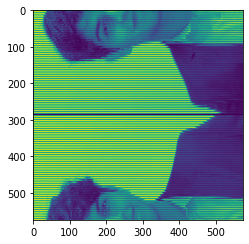

In [9]:
import numpy as np 
import PIL 
import matplotlib.pyplot as plt 
 
 
plt.rcParams["figure.figsize"] = [7.00, 3.50] 
plt.rcParams["figure.autolayout"] = True 
 
def imageImport(file): 
  img = PIL.Image.open(file)     
  gray_img = img.convert("L")     
  print(gray_img.size)     
  imgArr = np.array(gray_img) 
  return imgArr 
 
matrix=imageImport('aun.jpeg') 
 
 
 
def encryption(image,key):   
  inputImageShape=image.shape   
  inputrows=inputImageShape[0] 
  n=len(key)   
  sortedKey=sorted(key) 
  divisible=inputImageShape[1]//len(sortedKey) 
 
  numsRows=inputImageShape[0] 
  numCols=divisible*len(sortedKey)+inputImageShape[1]%len(sortedKey)   
  matrix1=np.zeros((numsRows,numCols)) 
 
  hashmap = { i : sortedKey[i] for i in range(0, len(sortedKey) ) } 
 
  hashmap = {value:key for key, value in hashmap.items()} 
 
  print(hashmap) 
 
  transpose=matrix.T   
  transpose1=matrix1.T   
  for i in range(0,numCols-inputImageShape[1]%len(sortedKey)):       
    currentItem=key[i%len(key)]       
    currentIndex=hashmap[currentItem] 
    a = i//len(key)       
    b = len(key)*a       
    c = b + currentIndex       
    transpose1[c]=transpose[i]   
    final = transpose1.T   
    plt.imshow(final)   
    flattening=final.flatten()   
    rolling=np.roll(flattening,numCols//2)   
    reshaping=rolling.reshape(numsRows,numCols) 
  transposing = reshaping.T 
   
  plt.imshow(transposing) 
  return transposing 
   
 
Cipherimage = encryption(matrix,'AUNALI') 


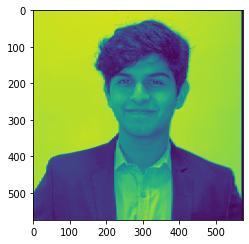

In [10]:

def decryption(matrix,key): 
 
  decrypttranspose = matrix.T   
  inputImageShape=decrypttranspose.shape   
  inputrows=inputImageShape[0] 
  n=len(key)   
  sortedKey=sorted(key) 
  divisible=inputImageShape[1]//len(sortedKey) 
 
  numsRows=inputImageShape[0] 
  numCols=divisible*len(sortedKey)+inputImageShape[1]%len(sortedKey)   
  matrix1=np.zeros((numsRows,numCols)) 
 
  hashmap = { i : sortedKey[i] for i in range(0, len(sortedKey) ) } 
 
  hashmap = {value:key for key, value in hashmap.items()} 
   
  reflattening=decrypttranspose.flatten()   
  rerolling=np.roll(reflattening,numCols//2)   
  retranspose=rerolling.reshape(numsRows,numCols)  
  plt.imshow(retranspose) 
 
 
  finaldecrypt=np.zeros((numsRows,numCols)) 
 
  retranspose1=retranspose.T   
  for i in range(0,numCols-inputImageShape[1]%len(sortedKey)):       
    currentItem=key[i%len(key)] 
    currentIndex=hashmap[currentItem] 
    a = i//len(key)       
    b = len(key)*a       
    c = b + currentIndex       
    finaldecrypt[i]=retranspose1[c] 
  finaldecrypt = finaldecrypt.T 
 
  plt.imshow(finaldecrypt) 
 
 
decryption(Cipherimage,'AUNALI')

